In [22]:
class node:
  def __init__(self ,parent, left, right , values , column, threshhold):
    self.parent:node = parent
    self.left:node  = left
    self.right:node = right
    self.values:np.ndarray = values
    self.column:int = column
    self.threshhold:float = threshhold

  def is_leaf(self):
    if self.values is None:
      return False
    return True

In [23]:
import numpy as np
class DecisionTree:
    # Multiclass Decision Tree classifier

    def __init__(self):
        self.tree = node(None, None, None, None, None, None)
        self.number_of_classes = -1
        self.classes = None

    def fit(self, X, Y, max_depth=5, kind='best', sample_size=20):
        self.tree = DecisionTree()
        self.tree.fit(X, Y, max_depth=max_depth, kind=kind, sample_size=sample_size)
        

    def predict(self, X):
      predicted_labels = self.tree.predict(X)
      return predicted_labels

    def _predict_tree(self, tree, X):
        tree = DecisionTree()
        node = tree.tree
        X = np.array([[2, 3], [3, 4]])
        predicted_labels = tree._predict_tree(node, X)
        

    def _tree_builder(self, tree, X, Y, depth):
        tree = DecisionTree()
        node = tree.tree
        X = np.array([[1, 2], [2, 3], [3, 4]])
        Y = np.array([0, 1, 0])
        tree._tree_builder(node, X, Y, depth=1)
        

    def _check_leaf(self, Y):
        tree = DecisionTree()
        Y = np.array([0, 0, 0])
        is_leaf = tree._check_leaf(Y)
        

    def _build_leaf(self, node, Y):
        tree = DecisionTree()
        node = tree.tree
        Y = np.array([0, 1, 0])
        tree._build_leaf(node, Y)
        

    def _calculate_entropy(self, labels):
        tree = DecisionTree()
        labels = np.array([0, 1, 0, 1, 1])
        entropy = tree._calculate_entropy(labels)
        
        
    def _information_gain(self, X, Y, column, row):
        tree = DecisionTree()
        X = np.array([[1, 2], [2, 3], [3, 4]])
        Y = np.array([0, 1, 0])
        gain = tree._information_gain(X, Y, column=1, threshold=2)
        

    def _find_split(self, X, Y):
        tree = DecisionTree()
        X = np.array([[1, 2], [2, 3], [3, 4]])
        Y = np.array([0, 1, 0])
        split = tree._find_split(X, Y)



In [24]:
# 1.B
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


x=np.load('x.npy')
y=np.load('y.npy')


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [25]:
max_depth_values = [5, 10, 15,20]
min_samples_split_values = [2, 5, 10,15]

results = {} 

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results[(max_depth, min_samples_split)] = accuracy



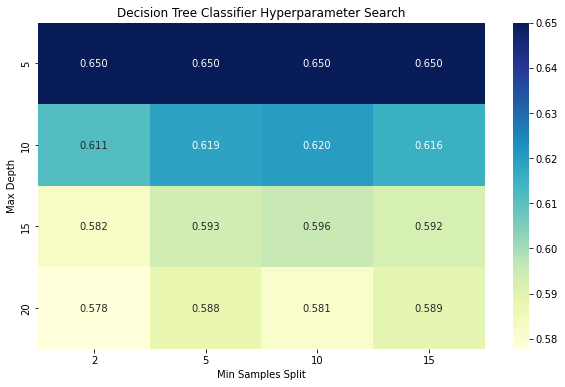

In [26]:
results_df = pd.DataFrame({'Max Depth': [params[0] for params in results.keys()],
                           'Min Samples Split': [params[1] for params in results.keys()],
                           'Accuracy': [accuracy for accuracy in results.values()]})

# Create a pivot table for the heatmap
pivot_table = results_df.pivot('Max Depth', 'Min Samples Split', 'Accuracy')

# Create a heatmap to visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Decision Tree Classifier Hyperparameter Search')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

In [27]:
# 1.C
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

accuracies={}
random_classifier=RandomForestClassifier()
random_classifier.fit(X_train,y_train)
random_predict=random_classifier.predict(X_test)
acc=accuracy_score(y_test,random_predict)

accuracies['Random Forest accuracy']=acc


sgd_classifier=SGDClassifier()
sgd_classifier.fit(X_train,y_train)
sgd_predict=random_classifier.predict(X_test)
acc=accuracy_score(y_test,sgd_predict)
accuracies['Gradiant accuracy']=acc

In [28]:
display(accuracies)

{'Random Forest accuracy': 0.6811111111111111,
 'Gradiant accuracy': 0.6811111111111111}

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score , confusion_matrix
train_sizes=[0.25,0.5,0.75,1]
Evaluations={}
accuracy_scores_random=[]
accuracy_scores_gradiant=[]
cm_random_forest=[]
cm_gradiant_decsent=[]


for trainSize in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=trainSize, random_state=42)
    random_classifier=RandomForestClassifier()
    random_classifier.fit(X_train,y_train)
    random_predict=random_classifier.predict(X_test)
    precision = precision_score(y_test, random_predict,average=None)
    recall = recall_score(y_test, random_predict,average=None)
    f1 = f1_score(y_test, random_predict,average=None)
    random_acc= {"precision":precision,"recall":recall,'f1':f1}
    sgd_classifier=SGDClassifier()
    sgd_classifier.fit(X_train,y_train)
    sgd_predict=random_classifier.predict(X_test)
    precision = precision_score(y_test, sgd_predict,average=None)
    recall = recall_score(y_test, sgd_predict,average=None)
    f1 = f1_score(y_test, sgd_predict,average=None)
    sgd_acc= {"precision":precision,"recall":recall,'f1':f1}
    key='train Size ' + str(trainSize)
    Evaluations[key]={'Random':random_acc,'Gradiant':sgd_acc}
    cm=confusion_matrix(y_test,random_predict)
    cm_random_forest.append([trainSize,cm])
    accuracy_random = accuracy_score(y_test, random_predict)

    cm=confusion_matrix(y_test,sgd_predict)
    cm_gradiant_decsent.append([trainSize,cm])
    accuracy_score_gradiant = accuracy_score(y_test, sgd_predict)

    accuracy_scores_random.append(accuracy_random)
    accuracy_scores_gradiant.append(accuracy_score_gradiant)



In [30]:
for i in range(len(cm_random_forest)):
    print('Random forest train size :',cm_random_forest[i][0],' confusion matrix: \n',cm_random_forest[i][1])


Random forest train size : 0.25  confusion matrix: 
 [[182  39  42   5]
 [ 38 178  24  40]
 [ 40   5 216  33]
 [ 17  20  38 208]]
Random forest train size : 0.5  confusion matrix: 
 [[392  92  61  25]
 [ 66 367  40  77]
 [ 81  12 417  57]
 [ 31  33  79 420]]
Random forest train size : 0.75  confusion matrix: 
 [[562 144  96  41]
 [ 93 541  57 135]
 [126  21 586 123]
 [ 55  58 110 627]]
Random forest train size : 1  confusion matrix: 
 [[1]]


In [31]:
for i in range(len(cm_gradiant_decsent)):
    print('Gradiant decsent train size :',cm_gradiant_decsent[i][0],' confusion matrix: \n',cm_gradiant_decsent[i][1])

Gradiant decsent train size : 0.25  confusion matrix: 
 [[182  39  42   5]
 [ 38 178  24  40]
 [ 40   5 216  33]
 [ 17  20  38 208]]
Gradiant decsent train size : 0.5  confusion matrix: 
 [[392  92  61  25]
 [ 66 367  40  77]
 [ 81  12 417  57]
 [ 31  33  79 420]]
Gradiant decsent train size : 0.75  confusion matrix: 
 [[562 144  96  41]
 [ 93 541  57 135]
 [126  21 586 123]
 [ 55  58 110 627]]
Gradiant decsent train size : 1  confusion matrix: 
 [[1]]


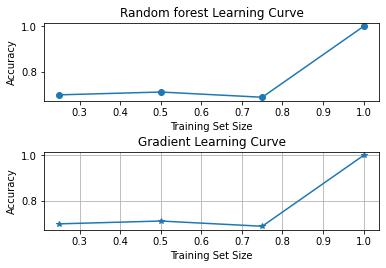

In [32]:
fig , axs=plt.subplots(2)
fig.tight_layout(pad=3)
# Plot the learning curve
axs[0].plot(train_sizes, accuracy_scores_random, marker='o')
axs[0].set_title('Random forest Learning Curve')
axs.flat[0].set(xlabel='Training Set Size',ylabel='Accuracy')

axs[1].plot(train_sizes, accuracy_scores_gradiant, marker='*')
axs[1].set_title('Gradient Learning Curve')
axs.flat[1].set(xlabel='Training Set Size',ylabel='Accuracy')

plt.grid(True)
plt.show()

In [33]:
for key in Evaluations.keys():
    print(key)
    print(Evaluations[key]['Random'])
    print(Evaluations[key]['Gradiant'])

train Size 0.25
{'precision': array([0.65703971, 0.73553719, 0.675     , 0.72727273]), 'recall': array([0.67910448, 0.63571429, 0.73469388, 0.73498233]), 'f1': array([0.66788991, 0.68199234, 0.70358306, 0.73110721])}
{'precision': array([0.65703971, 0.73553719, 0.675     , 0.72727273]), 'recall': array([0.67910448, 0.63571429, 0.73469388, 0.73498233]), 'f1': array([0.66788991, 0.68199234, 0.70358306, 0.73110721])}
train Size 0.5
{'precision': array([0.6877193 , 0.7281746 , 0.69849246, 0.7253886 ]), 'recall': array([0.6877193 , 0.66727273, 0.73544974, 0.74600355]), 'f1': array([0.6877193 , 0.69639469, 0.71649485, 0.73555166])}
{'precision': array([0.6877193 , 0.7281746 , 0.69849246, 0.7253886 ]), 'recall': array([0.6877193 , 0.66727273, 0.73544974, 0.74600355]), 'f1': array([0.6877193 , 0.69639469, 0.71649485, 0.73555166])}
train Size 0.75
{'precision': array([0.6722488 , 0.70811518, 0.69022379, 0.67710583]), 'recall': array([0.66666667, 0.65496368, 0.68457944, 0.73764706]), 'f1': array